# **Libraries**

In [20]:
import tensorflow as tf 
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dropout, Flatten, Dense, MaxPool2D, GlobalAveragePooling1D, Flatten 
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt

# **Import EMG Feature (CSV file)**

In [8]:
df = pd.read_csv(r"C:\Users\hpalm\Downloads\p1 (1).csv")
df

,Canal_1,Canal_2,Canal_3,Canal_4,Canal_5,Canal_6,Canal_7,Canal_8,Clase
0,0.031250,-0.335938,-0.195312,-0.031250,0.078125,0.031250,0.078125,0.007812,0
1,-0.117188,0.304688,0.453125,0.140625,-0.070312,-0.007812,0.015625,-0.054688,0
2,-0.101562,-0.320312,-0.117188,0.109375,0.125000,0.023438,-0.015625,0.007812,0
3,-0.359375,-0.132812,-0.570312,-0.273438,-0.093750,-0.078125,-0.085938,-0.062500,0
4,0.281250,0.187500,0.570312,0.289062,0.101562,0.031250,0.031250,-0.093750,0
...,...,...,...,...,...,...,...,...,...
35995,0.000000,-0.007812,-0.023438,-0.007812,-0.007812,-0.015625,-0.007812,-0.007812,5
35996,0.000000,-0.015625,-0.007812,0.007812,-0.007812,-0.007812,-0.007812,0.007812,5
35997,-0.007812,-0.007812,0.000000,0.000000,-0.007812,-0.007812,0.000000,-0.015625,5
35998,0.000000,-0.007812,-0.007812,0.000000,-0.007812,-0.007812,-0.023438,-0.007812,5


# **Train and Test set**

In [11]:
X = df.iloc[:,:-1]
y = df.iloc[:,8:]
X = np.array(X[:])

In [12]:
# Split data into train, test and validatio sets 

X_train, X_test, y_train, y_test= train_test_split(X, y,test_size=0.2,random_state=0, stratify=y)
X_train, X_val, y_train, y_val= train_test_split(X_train, y_train,test_size=0.2,random_state=0, stratify=y_train)

print('Testing data shape : ', X_test.shape, y_test.shape)
print('Training data shape : ', X_train.shape, y_train.shape)
print('validation data shape : ', X_val.shape, y_val.shape)

Testing data shape :  (7200, 8) (7200, 1)
Training data shape :  (23040, 8) (23040, 1)
validation data shape :  (5760, 8) (5760, 1)


In [17]:
X_train_cnn = np.reshape(X_train,(X_train.shape[0], X_train.shape[1], 1, 1))
X_test_cnn = np.reshape(X_test,(X_test.shape[0], X_test.shape[1], 1, 1))
X_train_cnn.shape

(23040, 8, 1, 1)

# **Build CNN and train**

In [27]:
custom_early_stopping = EarlyStopping (monitor='loss', patience=3)

In [28]:
#CNN 

model = Sequential()

model.add(Conv2D(64, 1, strides=1, padding='same', activation='relu', input_shape=(((X_train.shape[1], 1, 1)))))
model.add(Conv2D(64, (3,3), strides=1, padding='same', activation= "relu"))
model.add(MaxPool2D(1,1))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,1), strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(1,1))
model.add(Dropout(0.15))

model.add(Conv2D(32, (1,1), strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(1,1))
model.add(Dropout(0.15))

model.add(Flatten())
model.add(Dense(6, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 8, 1, 64)          128       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 1, 64)          36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 1, 64)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 8, 1, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 1, 64)          12352     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 1, 64)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 8, 1, 64)         

In [29]:
history = model.fit(X_train_cnn, y_train, batch_size=256,epochs=100, callbacks=[custom_early_stopping])

Epoch 1/100
90/90 [==============================] - 2s 16ms/step - loss: 1.5911 - accuracy: 0.3279
Epoch 2/100
90/90 [==============================] - 1s 15ms/step - loss: 1.2947 - accuracy: 0.4482
Epoch 3/100
90/90 [==============================] - 1s 15ms/step - loss: 1.2316 - accuracy: 0.4854
Epoch 4/100
90/90 [==============================] - 1s 15ms/step - loss: 1.1887 - accuracy: 0.5096
Epoch 5/100
90/90 [==============================] - 1s 15ms/step - loss: 1.1689 - accuracy: 0.5176
Epoch 6/100
90/90 [==============================] - 1s 15ms/step - loss: 1.1513 - accuracy: 0.5266
Epoch 7/100
90/90 [==============================] - 1s 15ms/step - loss: 1.1417 - accuracy: 0.5313
Epoch 8/100
90/90 [==============================] - 1s 15ms/step - loss: 1.1324 - accuracy: 0.5404
Epoch 9/100
90/90 [==============================] - 1s 15ms/step - loss: 1.1230 - accuracy: 0.5407
Epoch 10/100
90/90 [==============================] - 1s 15ms/step - loss: 1.1182 - accuracy: 0.5426

In [33]:
predicted_classes2 = model.predict(X_test_cnn)

In [34]:
predicted_classes=[]
for predicted_sport in predicted_classes2:
    predicted_classes.append(predicted_sport.tolist().index(max(predicted_sport)))
predicted_classes=np.array(predicted_classes)

In [37]:
predicted_classes.shape, y_test.shape

((7200,), (7200, 1))

In [41]:
#rounded_labels = np.argmax(test_Y, axis=1)
rounded_labels = y_test
#rounded_labels[2]

In [46]:
model.evaluate(X_test_cnn,y_test)

225/225 [==============================] - 1s 2ms/step - loss: 1.0274 - accuracy: 0.5825


[1.027413249015808, 0.5824999809265137]

# **Confusion Matrix**

In [49]:
from sklearn.metrics import confusion_matrix
import itertools


#predicted_classes_m = np.argmax(predicted_classes,axis=1)
#test_Y_m = np.argmax(test_Y,axis=1)
#Esto es dificil de leer 

#confusion_matrix(test_Y, predicted_classes_m)

cm = confusion_matrix(rounded_labels,predicted_classes)



In [50]:
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j],'.2f'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    #plt.savefig(r'C:\Users\hpalm\Desktop\Programacion\Proyecto_de_grado\Jupyter\Matrices de confusion\all_to_one_32_18_1_2deci.png', transparent = False, bbox_inches = 'tight')

Normalized confusion matrix
[[4.25833333e-01 6.41666667e-02 1.48333333e-01 2.00833333e-01
  1.56666667e-01 4.16666667e-03]
 [7.41666667e-02 4.23333333e-01 2.16666667e-01 7.66666667e-02
  1.20000000e-01 8.91666667e-02]
 [9.91666667e-02 2.06666667e-01 4.17500000e-01 9.00000000e-02
  1.65000000e-01 2.16666667e-02]
 [9.75000000e-02 3.66666667e-02 7.08333333e-02 6.15000000e-01
  1.79166667e-01 8.33333333e-04]
 [6.66666667e-02 8.58333333e-02 7.58333333e-02 1.38333333e-01
  6.28333333e-01 5.00000000e-03]
 [0.00000000e+00 1.33333333e-02 0.00000000e+00 0.00000000e+00
  1.66666667e-03 9.85000000e-01]]


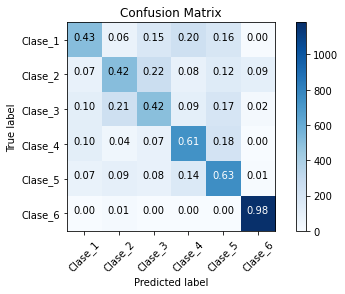

In [51]:
cm_plot_labels = ['Clase_1','Clase_2','Clase_3','Clase_4','Clase_5','Clase_6']
plot_confusion_matrix(cm,cm_plot_labels, title = 'Confusion Matrix')

# **Metrics**

In [54]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



accuracy = accuracy_score(y_test, predicted_classes)
precision = precision_score(y_test, predicted_classes, average='weighted')
recall = recall_score(y_test, predicted_classes, average='weighted')
f1 = f1_score(y_test, predicted_classes, average='weighted')

print('Accuracy: ', "%.2f" % (accuracy*100))
print('F1 : ', "%.2f" % (precision*100))
print('Recall_Score: ', "%.2f" % (recall*100))
print('Precision : ', "%.2f" % (f1*100))

Accuracy:  58.25
F1 :  57.65
Recall_Score:  58.25
Precision :  57.54


In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted_classes))

              precision    recall  f1-score   support

           0       0.56      0.43      0.48      1200
           1       0.51      0.42      0.46      1200
           2       0.45      0.42      0.43      1200
           3       0.55      0.61      0.58      1200
           4       0.50      0.63      0.56      1200
           5       0.89      0.98      0.94      1200

    accuracy                           0.58      7200
   macro avg       0.58      0.58      0.58      7200
weighted avg       0.58      0.58      0.58      7200

